# random forest

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"D:\MUFG\employee_attrition.csv")
df


,Age,Department,Years_At_Company,Salary,Overtime,JobSatisfaction,Attrition
0,29,Sales,12,38,No,3,No
1,23,Finance,12,98,No,1,Yes
2,39,Tech,19,46,No,1,No
3,37,Finance,14,46,No,5,Yes
4,36,Tech,16,90,No,4,Yes
5,30,HR,8,100,Yes,5,No
6,28,Tech,17,51,Yes,5,No
7,27,Tech,0,63,Yes,2,Yes
8,49,HR,3,97,No,1,No
9,24,Tech,17,84,No,5,No


In [4]:
df.head()


,Age,Department,Years_At_Company,Salary,Overtime,JobSatisfaction,Attrition
0,29,Sales,12,38,No,3,No
1,23,Finance,12,98,No,1,Yes
2,39,Tech,19,46,No,1,No
3,37,Finance,14,46,No,5,Yes
4,36,Tech,16,90,No,4,Yes


In [5]:
df.isnull().sum()

Age                 0
Department          0
Years_At_Company    0
Salary              0
Overtime            0
JobSatisfaction     0
Attrition           0
dtype: int64

In [6]:
categorical_cols = ["Department","Overtime"]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df

,Age,Department,Years_At_Company,Salary,Overtime,JobSatisfaction,Attrition
0,29,2,12,38,0,3,No
1,23,0,12,98,0,1,Yes
2,39,3,19,46,0,1,No
3,37,0,14,46,0,5,Yes
4,36,3,16,90,0,4,Yes
5,30,1,8,100,1,5,No
6,28,3,17,51,1,5,No
7,27,3,0,63,1,2,Yes
8,49,1,3,97,0,1,No
9,24,3,17,84,0,5,No


In [7]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4666666666666667
Confusion Matrix:
 [[5 2]
 [6 2]]
Classification Report:
               precision    recall  f1-score   support

          No       0.45      0.71      0.56         7
         Yes       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15



Feature Importances:
 Salary              0.313627
Age                 0.233029
Years_At_Company    0.180854
JobSatisfaction     0.129833
Department          0.112483
Overtime            0.030173
dtype: float64


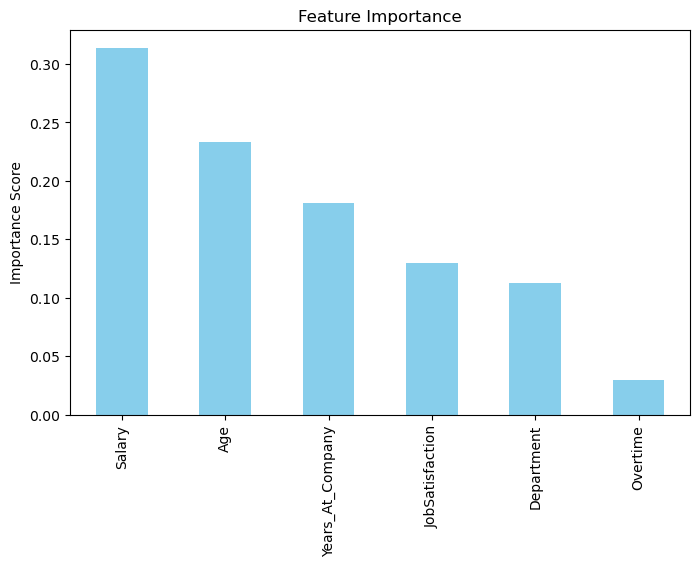

In [11]:
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)
plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


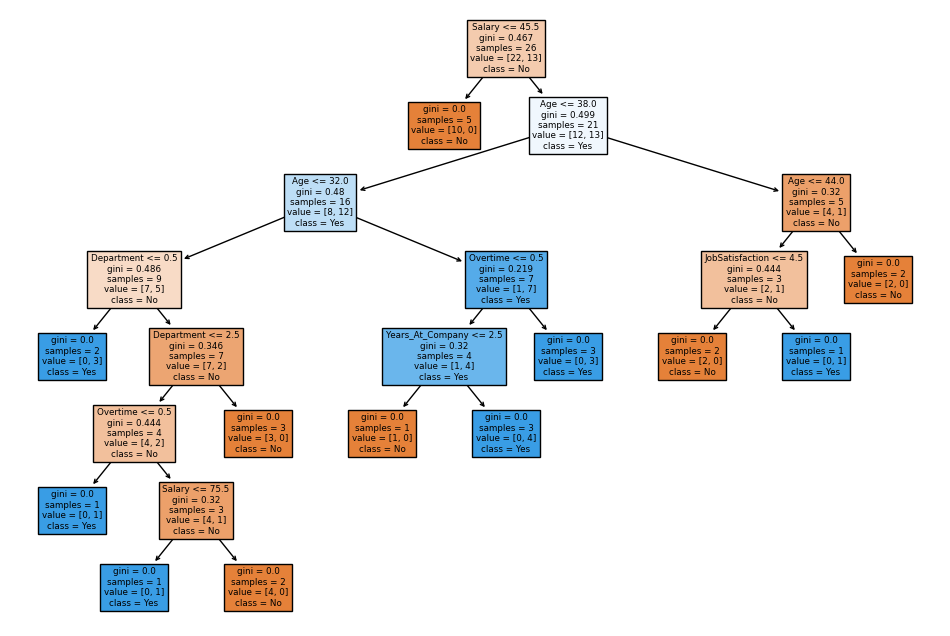

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=["No","Yes"], filled=True)
plt.show()
